### Example for DNN with the IMDB dataset (including regularization)

Loading the dataset and checking dimensions

In [15]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)
print(len(train_labels), len(test_labels))
print(train_data[0])
print(train_labels[0])

(25000,) (25000,)
25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Exploring and pre-processing the dataset

In [16]:
print(max([max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

9999
? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Defining the model structure

In [18]:
from tensorflow.keras import models, layers

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Training the model and plotting errors along the process

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2024-02-19 15:42:16.699710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5199 - acc: 0.7861

2024-02-19 15:42:18.782527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 67ms/step - loss: 0.5199 - acc: 0.7861 - val_loss: 0.3884 - val_acc: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3119 - acc: 0.8993 - val_loss: 0.3034 - val_acc: 0.8868
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2250 - acc: 0.9280 - val_loss: 0.2793 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1782 - acc: 0.9398 - val_loss: 0.2826 - val_acc: 0.8860
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1464 - acc: 0.9527 - val_loss: 0.2852 - val_acc: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1198 - acc: 0.9626 - val_loss: 0.3342 - val_acc: 0.8708
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1019 - acc: 0.9692 - val_loss: 0.3141 - val_acc: 0.8835
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0877 - acc: 0.9753 

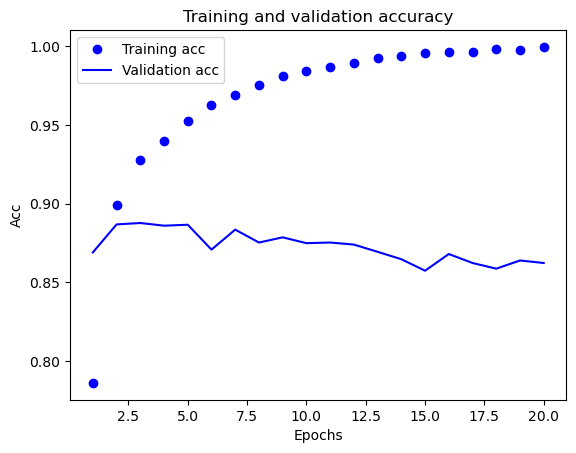

In [20]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


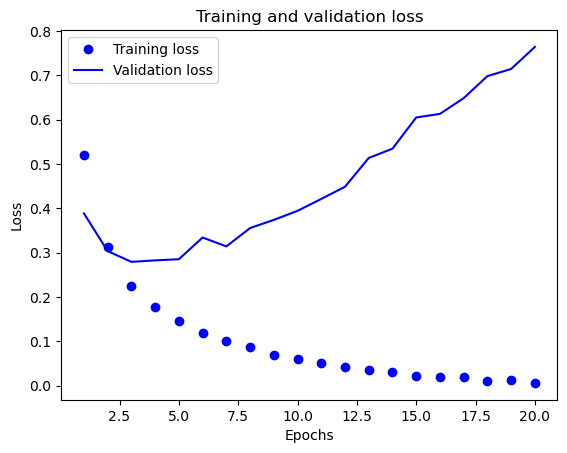

In [21]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predicting for the test set and calculating errors

In [22]:
preds = model.predict(x_test) # probabilities
class_preds = preds > 0.5

print(preds[0:5])
class_preds[0:5]

 62/782 [=>............................] - ETA: 1s

2024-02-19 15:42:33.216261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 2s 2ms/step
[[0.01436392]
 [1.        ]
 [0.9957224 ]
 [0.994639  ]
 [0.9991997 ]]


array([[False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [23]:
results = model.evaluate(x_test, y_test, verbose = 0)
results

[0.8128114342689514, 0.8489599823951721]

Overfitting - controlling capacity of the model

Epoch 1/20


2024-02-19 15:42:42.912806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5442 - acc: 0.7537

2024-02-19 15:42:44.959510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 66ms/step - loss: 0.5442 - acc: 0.7537 - val_loss: 0.4272 - val_acc: 0.8612
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3573 - acc: 0.8929 - val_loss: 0.3550 - val_acc: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2741 - acc: 0.9154 - val_loss: 0.3053 - val_acc: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2250 - acc: 0.9325 - val_loss: 0.2842 - val_acc: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1880 - acc: 0.9444 - val_loss: 0.2767 - val_acc: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1619 - acc: 0.9517 - val_loss: 0.2726 - val_acc: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1410 - acc: 0.9587 - val_loss: 0.2785 - val_acc: 0.8869
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1230 - acc: 0.9666 

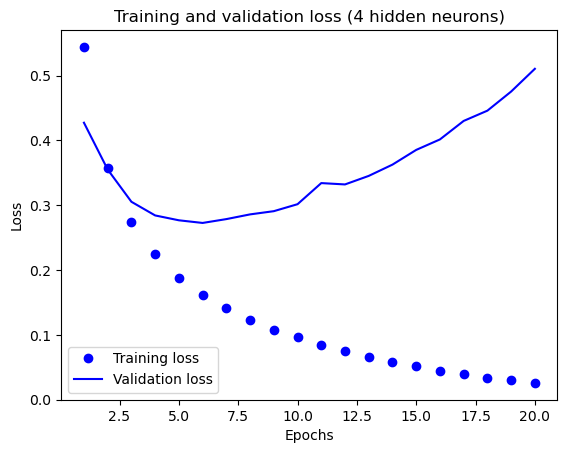

In [24]:
hidden = 4

model2 = models.Sequential()
model2.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(hidden, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

results2 = model2.evaluate(x_test, y_test, verbose = 0)
print(results2)

history_dict2 = history2.history
loss_values2 = history_dict2['loss'] 
val_loss_values2 = history_dict2['val_loss']

plt.plot(epochs, loss_values2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values2, 'b', label='Validation loss')
plt.title('Training and validation loss (4 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20


2024-02-19 15:43:05.634732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4993 - acc: 0.7607

2024-02-19 15:43:07.921582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 76ms/step - loss: 0.4993 - acc: 0.7607 - val_loss: 0.4577 - val_acc: 0.7827
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2815 - acc: 0.8943 - val_loss: 0.2811 - val_acc: 0.8898
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2059 - acc: 0.9234 - val_loss: 0.2828 - val_acc: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1536 - acc: 0.9425 - val_loss: 0.2916 - val_acc: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1351 - acc: 0.9495 - val_loss: 0.3243 - val_acc: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1124 - acc: 0.9605 - val_loss: 0.3468 - val_acc: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0950 - acc: 0.9683 - val_loss: 0.3769 - val_acc: 0.8801
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0715 - acc: 0.9773 

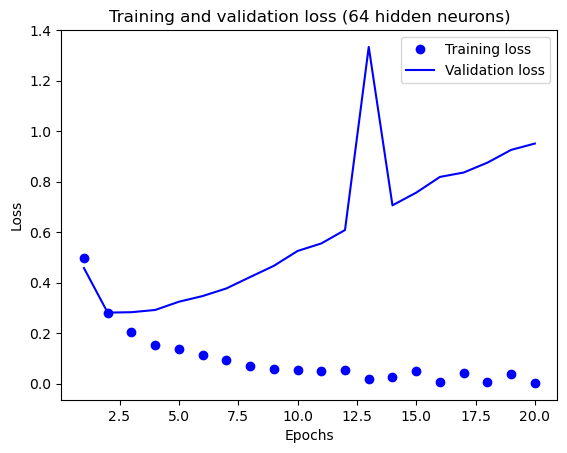

In [25]:
hidden = 64

model3 = models.Sequential()
model3.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(hidden, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


results3 = model3.evaluate(x_test, y_test, verbose = 0)
print(results3)

history_dict3 = history3.history
loss_values3 = history_dict3['loss'] 
val_loss_values3 = history_dict3['val_loss']

plt.plot(epochs, loss_values3, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values3, 'b', label='Validation loss')
plt.title('Training and validation loss (64 hidden neurons)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

L2 regularization 

Epoch 1/20


2024-02-19 15:43:29.177288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5854 - acc: 0.7739

2024-02-19 15:43:32.025497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 4s 97ms/step - loss: 0.5854 - acc: 0.7739 - val_loss: 0.4584 - val_acc: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3903 - acc: 0.8897 - val_loss: 0.3862 - val_acc: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3076 - acc: 0.9169 - val_loss: 0.3387 - val_acc: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2625 - acc: 0.9313 - val_loss: 0.3327 - val_acc: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2380 - acc: 0.9398 - val_loss: 0.3340 - val_acc: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2189 - acc: 0.9484 - val_loss: 0.3399 - val_acc: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2100 - acc: 0.9503 - val_loss: 0.3915 - val_acc: 0.8708
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1977 - acc: 0.9551 

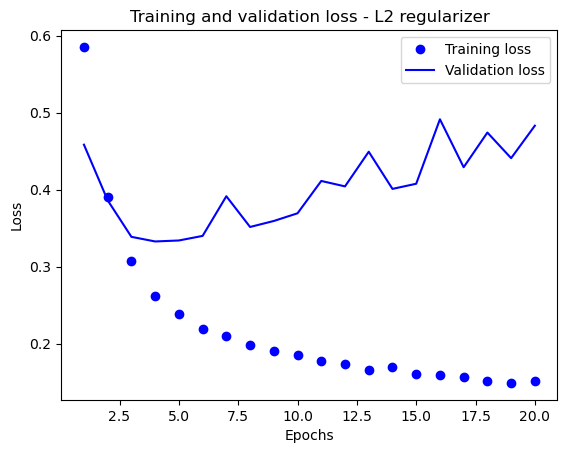

[0.5129759907722473, 0.8496000170707703]

In [26]:
from tensorflow.keras import regularizers

hidden = 16

model_l2 = models.Sequential()
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001),
                       input_shape=(10000,)))
model_l2.add(layers.Dense(hidden, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_l2.add(layers.Dense(1, activation='sigmoid'))

model_l2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_l2_dict = history_l2.history
loss_values_l2 = history_l2_dict['loss'] 
val_loss_values_l2 = history_l2_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values_l2, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_l2, 'b', label='Validation loss')
plt.title('Training and validation loss - L2 regularizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_l2 = model_l2.evaluate(x_test, y_test, verbose = 0)
results_l2

Dropout

Epoch 1/10


2024-02-19 15:44:14.303742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5977 - acc: 0.6775

2024-02-19 15:44:16.926896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 86ms/step - loss: 0.5977 - acc: 0.6775 - val_loss: 0.4602 - val_acc: 0.8244
Epoch 2/10
30/30 [==============================] - 1s 25ms/step - loss: 0.4270 - acc: 0.8223 - val_loss: 0.3550 - val_acc: 0.8707
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 0.3425 - acc: 0.8665 - val_loss: 0.3020 - val_acc: 0.8857
Epoch 4/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2886 - acc: 0.8985 - val_loss: 0.2893 - val_acc: 0.8851
Epoch 5/10
30/30 [==============================] - 1s 26ms/step - loss: 0.2549 - acc: 0.9109 - val_loss: 0.2970 - val_acc: 0.8802
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.2266 - acc: 0.9231 - val_loss: 0.2836 - val_acc: 0.8860
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1995 - acc: 0.9339 - val_loss: 0.2966 - val_acc: 0.8850
Epoch 8/10
30/30 [==============================] - 1s 23ms/step - loss: 0.1833 - acc: 0.9398 

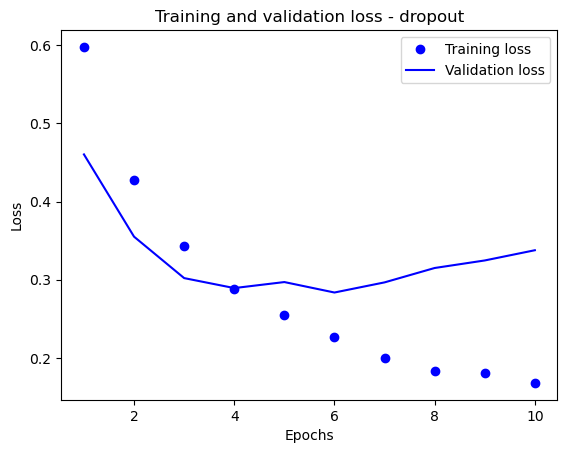

[0.3581952452659607, 0.8725200295448303]

In [27]:
model_dr = models.Sequential()
model_dr.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(hidden, activation='relu'))
model_dr.add(layers.Dropout(0.5))
model_dr.add(layers.Dense(1, activation='sigmoid'))

model_dr.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history_dr = model_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dr_dict = history_dr.history
loss_values_dr = history_dr_dict['loss'] 
val_loss_values_dr = history_dr_dict['val_loss']
epochs = range(1, len(loss_values_dr) + 1)

plt.plot(epochs, loss_values_dr, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_dr, 'b', label='Validation loss')
plt.title('Training and validation loss - dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_dr = model_dr.evaluate(x_test, y_test, verbose = 0)
results_dr

Early Stopping

Epoch 1/20


2024-02-19 15:44:31.572625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4971 - acc: 0.7788

2024-02-19 15:44:33.941243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 79ms/step - loss: 0.4971 - acc: 0.7788 - val_loss: 0.3765 - val_acc: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3013 - acc: 0.9014 - val_loss: 0.2993 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2184 - acc: 0.9323 - val_loss: 0.2843 - val_acc: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1737 - acc: 0.9443 - val_loss: 0.2861 - val_acc: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1408 - acc: 0.9553 - val_loss: 0.3231 - val_acc: 0.8740
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1213 - acc: 0.9627 - val_loss: 0.3207 - val_acc: 0.8781
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0997 - acc: 0.9716 - val_loss: 0.3249 - val_acc: 0.8804
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0844 - acc: 0.9769 

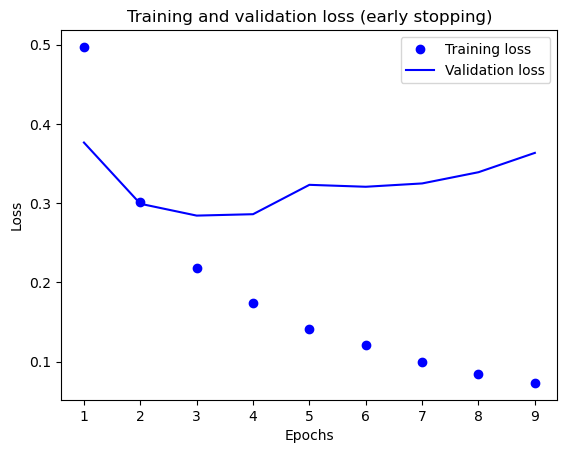

[0.3938339948654175, 0.865559995174408]

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

hidden = 16

model = models.Sequential()
model.add(layers.Dense(hidden, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(hidden, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

early = EarlyStopping(monitor='val_loss', min_delta=0, patience= 6, verbose= True, mode='auto')

callbacks = [early]
history_es = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callbacks)

history_dict_es = history_es.history
loss_values_es = history_dict_es['loss'] 
val_loss_values_es = history_dict_es['val_loss']
epochs = range(1, len(loss_values_es) + 1)

plt.plot(epochs, loss_values_es, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values_es, 'b', label='Validation loss')
plt.title('Training and validation loss (early stopping)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_es = model.evaluate(x_test, y_test, verbose = 0)
results_es